In [37]:
# import the required packages
import numpy as np
import math
from lightcones import linalg as ll
from lightcones import models
from lightcones.solvers.schrodinger import solve
import matplotlib.pyplot as plt

In [ ]:
# Define the spectral density here:

# number of boson chain modes
num_star_modes = 500

# frequencies of the oscillator
dw = 0.01
w = np.array([1.0 + i*dw for i in range(num_star_modes)])

w_min = w[0]
w_max = w[-1]
B = w_max - w_min

print("w_min = ", w_min)
print("w_max = ", w_max)

#
def J_func(w):
    w_cusp = 3.5
    if (w < w_cusp):
        x = w - w_min

    if (w >= w_cusp):
        x = w_max - w

    #return 1 - math.cos(x * math.pi / 4 / B)
    return math.sin(x * math.pi / B)

J = np.zeros(len(w))

for i in range(len(w)):
    J[i] = J_func(w[i])

w_min =  1.0
w_max =  5.99


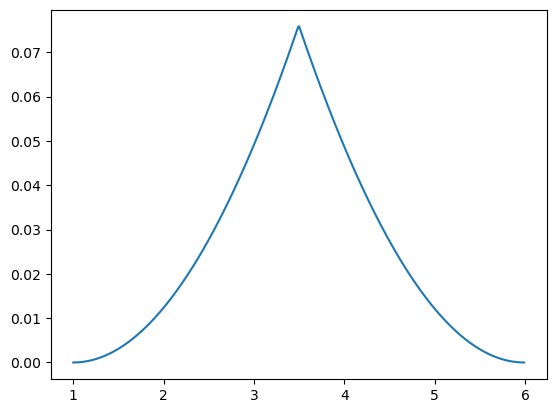

In [20]:
plt.plot(w, J)

In [22]:
coupling, e, h = models.to_chain(w, J)

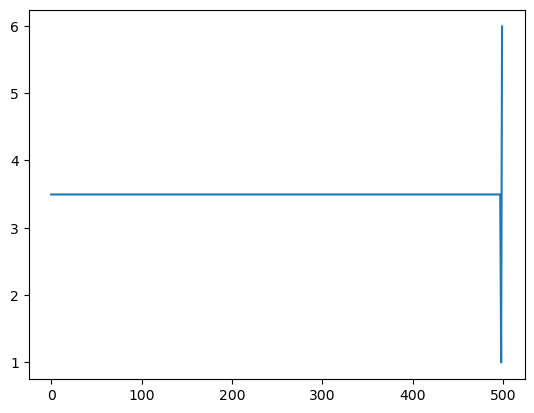

In [24]:
plt.plot(e)

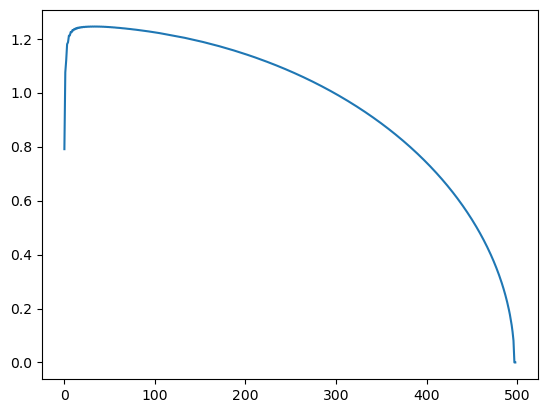

In [25]:
plt.plot(h)

In [26]:
coupling

np.float64(3.5674593147859803)

In [29]:
t = 1000
dt = 0.01
tg = np.arange(0, t + dt, dt)
ntg = tg.size

In [30]:
import lightcones
alpha = lightcones.spread(e, h, ntg, dt) 

In [31]:
def wigner(psi, k):
    
    ns = len(psi)
    nk = len(k)
    
    f = psi
    rho_w = np.zeros((ns, 2*ns), dtype = complex)
    
    for i in range(ns):
        for j in range(2*ns):
            if j < i:
                rho_w[i, j] = 0
                continue
                
            if j - i >= ns:
                rho_w[i, j] = 0
                continue
                
            rho_w[i, j] = f[i] * f[j - i].conj()

    w_ = np.zeros((nk, 2*ns), dtype = complex)

    for i in range(ns):
        for j in range(2*ns):
            for p in range(nk):
                w_[p, j] = w_[p, j] + rho_w[i, j] * np.exp(-1j * 2 * i * k[p])
            
    for i in range(2*ns):
        for p in range(nk):
            w_[p, i] = w_[p, i] * np.exp(1j * i * k[p])
            
    return w_

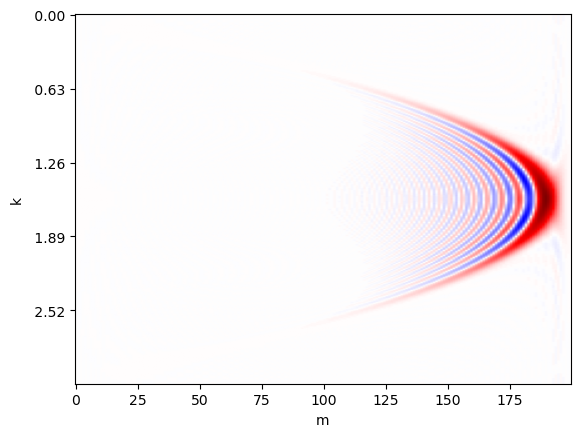

In [47]:
n_sites_cut = 200
ti = 8000
psi_ = alpha[:n_sites_cut, ti]
k = np.arange(0, math.pi, 0.01)

w_p = wigner(psi_, k)

max_ = np.max(np.abs(w_p[:]))

im = plt.imshow(w_p[:, :400:2].real, aspect='auto', cmap = 'seismic', vmin = -max_, vmax = max_)
plt.xlabel('m')
plt.ylabel('k')
plt.yticks([len(k)/5 * i for i in range(5)], labels = ["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)])
plt.show()

In [48]:
H = ll.tridiag(e, h)
E = np.zeros(len(k))
n = np.array(range(num_star_modes))

for p in range(len(k)):
    psi = np.exp(1j * n * k[p]) / math.sqrt(num_star_modes)
    E[p] = np.vdot(psi, H @ psi).real

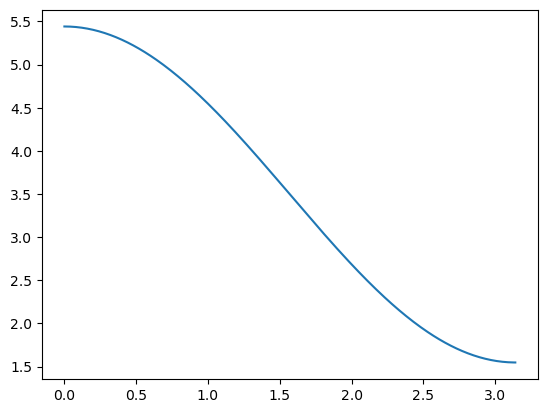

In [49]:
plt.plot(k, E)